## 梯度下降法模拟 Gradient Descent

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
plot_x = np.linspace(-1, 6, 140)
plot_x

array([-1.        , -0.94964029, -0.89928058, -0.84892086, -0.79856115,
       -0.74820144, -0.69784173, -0.64748201, -0.5971223 , -0.54676259,
       -0.49640288, -0.44604317, -0.39568345, -0.34532374, -0.29496403,
       -0.24460432, -0.1942446 , -0.14388489, -0.09352518, -0.04316547,
        0.00719424,  0.05755396,  0.10791367,  0.15827338,  0.20863309,
        0.25899281,  0.30935252,  0.35971223,  0.41007194,  0.46043165,
        0.51079137,  0.56115108,  0.61151079,  0.6618705 ,  0.71223022,
        0.76258993,  0.81294964,  0.86330935,  0.91366906,  0.96402878,
        1.01438849,  1.0647482 ,  1.11510791,  1.16546763,  1.21582734,
        1.26618705,  1.31654676,  1.36690647,  1.41726619,  1.4676259 ,
        1.51798561,  1.56834532,  1.61870504,  1.66906475,  1.71942446,
        1.76978417,  1.82014388,  1.8705036 ,  1.92086331,  1.97122302,
        2.02158273,  2.07194245,  2.12230216,  2.17266187,  2.22302158,
        2.27338129,  2.32374101,  2.37410072,  2.42446043,  2.47

In [7]:
plot_y = (plot_x - 2.5) ** 2 -1

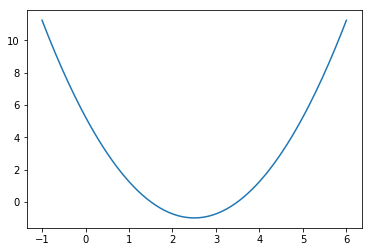

In [8]:
plt.plot(plot_x, plot_y)
plt.show()

In [9]:
def J(theta):
    return (theta - 2.5) ** 2 - 1

In [10]:
def dJ(theta):
    return 2 * (theta - 2.5)

In [11]:
theta = 0.0
eta = 0.1
epsilon = 1e-8

while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    
    if abs(J(theta) - J(last_theta)) < epsilon:
        break
        
print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


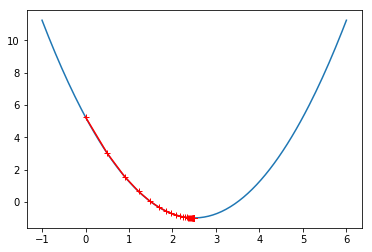

In [33]:
theta = 0.0
eta = 0.1
epsilon = 1e-8
theta_history = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)
    
    if abs(J(theta) - J(last_theta)) < epsilon:
        break
        
plt.plot(plot_x, J(plot_x))
plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='+')
plt.show()

In [15]:
len(theta_history)

46

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(initial_theta, eta, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)   # 注意这里的theta_history时可变类型的，使用append方法的时候没有加上 global 关键字进行定义
#     global theta_history
#     theta_history = [theta]
    
    while True:
        last_theta = theta
        theta = theta - eta * dJ(theta)
        theta_history.append(theta)
        
        if abs(J(theta) - J(last_theta)) < epsilon:
            break
            
def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='+')
    plt.show

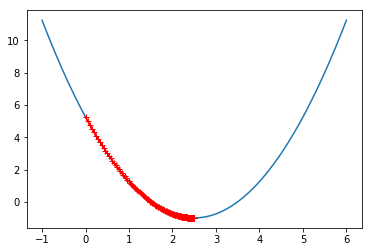

In [82]:
eta = 0.01
theta_history = []
gradient_descent(0.0, eta)
plot_theta_history()

In [83]:
len(theta_history)

424

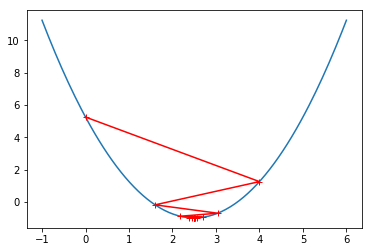

In [74]:
eta = 0.8
theta_history = []
gradient_descent(0.0, eta)
plot_theta_history()

In [ ]:
eta = 1.1
theta_history = []
gradient_descent(0.0, eta)
plot_theta_history()
# OverflowError: (34, 'Result too large')

In [51]:
def J(theta):
    try:
        return (theta - 2.5) ** 2 - 1
    except:
        return float('inf') # 表示正无穷

In [56]:
def gradient_descent(initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0
    
    while i_iter < n_iters:
        last_theta = theta
        theta = theta - eta * dJ(theta)
        theta_history.append(theta)
        
        if abs(J(theta) - J(last_theta)) < epsilon:
            break
        
        i_iter += 1

In [57]:
eta = 1.1
theta_history = []
gradient_descent(0.0, eta)

In [58]:
len(theta_history)

10001

In [59]:
theta_history[-1]

nan

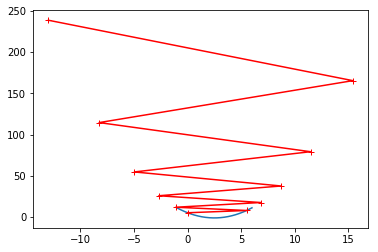

In [60]:
eta = 1.1
theta_history = []
gradient_descent(0.0, eta, n_iters=10)
plot_theta_history()

 ## 在线性回归模型中使用梯度下降法

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)   # 加了一个噪音

In [19]:
X = x.reshape(-1, 1)

In [20]:
X.shape

(100, 1)

In [21]:
y.shape

(100,)

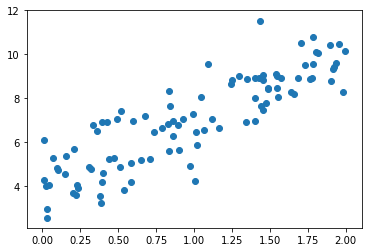

In [22]:
plt.scatter(X, y)
plt.show()

### 使用梯度下降法训练

In [23]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)  
    except:
        return float('inf')

In [24]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return res * 2 / len(X_b)

In [25]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        last_theta = theta
        theta = theta - eta * dJ(theta, X_b, y)
        
        if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
            break
        
        i_iter += 1
    return theta

In [26]:
X_b = np.hstack([np.ones((len(X), 1)) ,X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.1

theta = gradient_descent(X_b, y, initial_theta, eta)

In [27]:
theta

array([4.02302011, 3.00574511])

### 封装我们的线性回归算法

In [12]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [13]:
lin_reg.coef_

array([3.00517447])

In [14]:
lin_reg.interception_

4.02369667210379

In [28]:
# 封装后
def fit_gd(X_train, y_train, eta=0.1, max_iters=1e4, epsilon=1e-8):
    
    def J(theta, X_b, y):
        try:
            return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
        except:
            return float('inf')
        
    def dJ(theta, X_b, y):
        res = np.empty(X_b.shape[1])
        res[0] = np.sum(X_b.dot(theta) - y)
        for i in range(1, X_b.shape[1]):
            res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
        return res * 2 / len(X_b)
    
    def gradient_descent(X_b, y, initail_theta, eta, max_iters, epsilon):
    
        theta = initial_theta
        cur_iter = 0
        while cur_iter < max_iters:
            last_theta = theta
            theta = theta - eta * dJ(theta, X_b, y) 

            if abs(J(last_theta, X_b, y) - J(theta, X_b, y)) < epsilon:
                break
            cur_iter += 1
        return theta
    
    X_b = np.hstack([np.ones((len(X_train), 1)) ,X_train])
    initial_theta = np.zeros(X_b.shape[1])
    theta = gradient_descent(X_b, y_train, initial_theta, eta, max_iters, epsilon)
    return theta

# 注意fit_gd() 和gradient_descent() 及其调用的时候里面的参数的情况
# 这种写法最好的好处就是：fit_gd()里面 eta, n_iters和epsilon在调用的时候可以改变

## 梯度下降的向量化

In [1]:
import numpy as np 
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

X = boston.data
y = boston.target

X = X[y < 50]
y = y[y < 50]

In [3]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from playML.LinearRegression import LinearRegression

lin_reg1 = LinearRegression()
%time lin_reg1.fit_normal(X_train, y_train)
lin_reg1.score(X_test, y_test)

Wall time: 957 µs


0.8129802602658537

### 使用梯度下降法 

In [5]:
lin_reg2 = LinearRegression()
lin_reg2.fit_gd(X_train, y_train)

c:\users\xuyyuan\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\xuyyuan\Desktop\MachineLearning\playML\LinearRegression.py:31: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta))**2) / len(X_b)
C:\Users\xuyyuan\Desktop\MachineLearning\playML\LinearRegression.py:49: RuntimeWarning: invalid value encountered in double_scalars
  if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:


LinearRegression()

In [6]:
lin_reg2.coef_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [7]:
lin_reg2.fit_gd(X_train, y_train, eta=0.000001)

LinearRegression()

In [8]:
lin_reg2.score(X_test, y_test)

0.27556634853389195

In [9]:
%time lin_reg2.fit_gd(X_train, y_train, eta=0.000001, n_iters=1000000)

Wall time: 31.5 s


LinearRegression()

In [10]:
lin_reg2.score(X_test, y_test)

0.7541852353980762

In [7]:
X_train[:10, :]
# 每个特征对应的数据的规模是不一样的，有的数据是零点几，有的数据却能达到几百，所以即使eta很小，但最后梯度和步长很大，则就不收敛

array([[1.42362e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
        6.34300e+00, 1.00000e+02, 1.57410e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 2.03200e+01],
       [3.67822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.70000e-01,
        5.36200e+00, 9.62000e+01, 2.10360e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.80790e+02, 1.01900e+01],
       [1.04690e-01, 4.00000e+01, 6.41000e+00, 1.00000e+00, 4.47000e-01,
        7.26700e+00, 4.90000e+01, 4.78720e+00, 4.00000e+00, 2.54000e+02,
        1.76000e+01, 3.89250e+02, 6.05000e+00],
       [1.15172e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        5.70100e+00, 9.50000e+01, 3.78720e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.58770e+02, 1.83500e+01],
       [6.58800e-02, 0.00000e+00, 2.46000e+00, 0.00000e+00, 4.88000e-01,
        7.76500e+00, 8.33000e+01, 2.74100e+00, 3.00000e+00, 1.93000e+02,
        1.78000e+01, 3.95560e+02, 7.56000e+00],
       [2.49800e-02, 0.00000e+

### 使用梯度下降法前进行数据归一化

In [15]:
# 使用梯度下降法前，最好进行数据归一化
# 使用正规方程进行解的时候不需要进行归一化，因为已经将其变成了公式，中间搜索的过程比较少
# 使用梯度下降法时，由于有eta这个变量，如果数据不在一个维度上，将会影响我们梯度的结果，梯度的结果加上eta就是我们真正走的步长，如果步长过大或者过小，过大则不收敛，过小则搜索太慢

In [16]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
standardscaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
X_train_standard = standardscaler.transform(X_train)

In [18]:
lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_standard, y_train)

Wall time: 182 ms


LinearRegression()

In [21]:
X_test_standard = standardscaler.transform(X_test)

In [22]:
lin_reg3.score(X_test_standard, y_test)

0.8129880620122235

### 梯度下降法的优势

In [38]:
m = 1000
n = 5000

big_X = np.random.normal(size=(m, n)) # 使用随机化的正态分布产生数据，均值为0，标准差为1，所以数据已经进行归一化处理了，不用再归一化

true_theta = np.random.uniform(0.0, 100.0, size=n+1)
big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0., 10., size=m) # 最后一部分增加了一个噪音
# 注意big_y这种表示方式

In [39]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X, big_y)

Wall time: 6.66 s


LinearRegression()

In [41]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X, big_y)

Wall time: 2.76 s


LinearRegression()

## 随机梯度下降法

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4. * x + 3. + np.random.normal(size=m)

In [13]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2 / len(X_b)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    while i_iter < n_iters:
        last_theta = theta
        theta = theta - eta * dJ(theta, X_b, y)
        if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
            break
        i_iter += 1
    return theta

In [14]:
%%time
X_b = np.hstack([np.ones((len(X), 1)) ,X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

Wall time: 449 ms


In [15]:
theta

array([3.0019614 , 4.00133437])

### 随机梯度下降法

In [15]:
# J()这个函数其实已经用不着了

def dJ_sgd(theta, X_b_i, y_i): # 注意参数，已经不是X_b整个矩阵，而是其中的一行，相应的y也是其中的一个数值
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2. 

def sgd(X_b, y, initail_theta, n_iters):

    t0 = 5
    t1 = 50
    
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
        
    return theta        

In [16]:
%%time
X_b = np.hstack([np.ones((len(X), 1)) ,X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b)//3)

Wall time: 287 ms


In [17]:
theta

array([2.9472085 , 3.99748346])

In [1]:
# 封装随机梯度下降法
def fit_sgd(X, y, max_iters=5, t0=5, t1=50):

    def dJ_sgd(theta, X_b_i, y_i):
        return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2

    def sgd(X_b, y, initial_theta, max_iters, t0, t1):

        def learning_rate(t):
            return t0 / (t + t1)

        theta = initial_theta
        for cur_iter in range(max_iters):
            rand_i = np.random.randint(len(X_b))
            theta = theta - learning_rate(cur_iter) * dJ_sgd(theta, X_b[rand_i], y[rand_i])
        return theta

    X_b = np.hstack([np.ones((len(X), 1)), X])
    initial_theta = np.zeros(X_b.shape[1])
    theta = sgd(X_b, y, initial_theta, max_iters, t0, t1)
    return theta

## 使用我们自己的SGD

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4. * x + 3. + np.random.normal(size=m)

In [3]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_sgd(X, y, n_iters=2)

LinearRegression()

In [4]:
lin_reg.coef_

array([4.00565618])

In [5]:
lin_reg.interception_

2.9980310773444243

### 真实使用我们的SGD

In [49]:
from sklearn import datasets

boston = datasets.load_boston()

X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [50]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [51]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [52]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=2)
lin_reg.score(X_test_standard, y_test)
# 很明显，没有达到精度要求，下面增加n_iters的值

Wall time: 7.02 ms


0.5989890645417839

In [55]:
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=50)  # n_iters=50
lin_reg.score(X_test_standard, y_test)

Wall time: 115 ms


0.6678564031438194

In [59]:
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=100) # n_iters=100
lin_reg.score(X_test_standard, y_test)

Wall time: 330 ms


0.7191921798338312

## scikit-learn中的SGD

In [60]:
from sklearn.linear_model import SGDRegressor

In [65]:
sgd_reg = SGDRegressor()
%time sgd_reg.fit(X_train_standard, y_train)
sgd_reg.score(X_test_standard, y_test)

Wall time: 1 ms


c:\users\xuyyuan\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.6980531653523342

In [67]:
sgd_reg = SGDRegressor(max_iter=100)   # 默认max_iter=5
%time sgd_reg.fit(X_train_standard, y_train)
sgd_reg.score(X_test_standard, y_test)

Wall time: 6.02 ms


0.7284584005960977

## 如何调试梯度

In [135]:
import numpy as np
import matplotlib.pyplot as plt

In [136]:
np.random.seed(666)
X = np.random.random(size=(1000, 10))

In [137]:
true_theta = np.arange(1, 12, dtype=float) 

In [138]:
X_b = np.hstack([np.ones((len(X), 1)) ,X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)

In [140]:
X.shape

(1000, 10)

In [141]:
y.shape

(1000,)

In [142]:
true_theta

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [143]:
# theta

In [144]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [145]:
def dJ_math(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2 / len(X_b)
# 只适用于当前任务中对应的J()

In [146]:
def dJ_debug(theta, X_b, y, epsilon=0.01):   
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (J(theta_1, X_b, y) - J(theta_2, X_b, y)) / (2 * epsilon)
    return res
# 这是一个通用的方法!!下次在别的地方还是可以使用的哦,可以加到自己的工具箱中
# res[i] = (J(theta_1[i], X_b, y) - J(theta_2[i], X_b, y)) / 2 * (epsilon)  注意这种写法是错误的哦，多么痛的领悟

In [148]:
def gradient_descent(dJ, X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):  # 参数里面加上了dJ参数，代表函数
    theta = initial_theta
    cur_iter = 0
    while cur_iter < n_iters:
        last_theta = theta
        theta = theta - eta * dJ(theta, X_b, y)
        if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
            break
        cur_iter += 1
    return theta

In [149]:
X_b = np.hstack([np.ones((len(X), 1)) ,X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

%time theta = gradient_descent(dJ_debug, X_b, y, initial_theta, eta)
theta

Wall time: 7.54 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

In [150]:
%time theta = gradient_descent(dJ_math, X_b, y, initial_theta, eta)
theta

Wall time: 1.05 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

In [151]:
# 总结：
# 梯度下降法：批量梯度下降方法，随机梯度下降法， 小批量梯度下降法
# 随机的优点：跳出局部最优解，更快的运行速度，机器学习很多领域都需要使用随机，如：随机森林，随机搜索
# 梯度下降法不是一个机器学习方法而是一种基于搜索的最优化方法，作用：最小化损失函数，相应的梯度上升法可以最大化一个效用函数

##### 小的知识点——创造样本

In [156]:
m = 1000
n = 5000
np.random.seed(666)
X = np.random.random(size=(1000, 10))
true_theta = np.arange(1, 12, dtype=float)
X_b = np.hstack([np.ones((len(X), 1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)
# 创造样本的方法1

In [153]:
m = 100000
np.random.seed(666)
x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = x * 4. + 3. + np.random.normal(size=m)
# 创造样本的方法2

In [155]:
m = 1000
n = 5000
np.random.seed(666)
X_b = np.random.normal(size=(m, n))
true_theta = np.random.uniform(0.0, 100.0, size=n+1)
y = X_b.dot(true_theta[1:]) + true_theta[0] + np.random.normal(size=m)
# 创造样本的方法3